# 12. K-Nearest Neighbors (KNN)

**Purpose:** Learn and revise **K-Nearest Neighbors** in Scikit-learn.

---

## What is KNN?

**K-Nearest Neighbors** is a **instance-based** (lazy) method: it does not learn a compact model but stores the training data. To predict a new point:

1. Find the **k** training points **closest** to the new point (by distance, often Euclidean).
2. **Classification:** Output the **majority class** among those k neighbors (or weighted by distance).
3. **Regression:** Output the **mean** (or weighted mean) of their target values.

**Key idea:** No training step; prediction cost grows with data size. **Scale features** so distances are meaningful. **k** controls bias–variance: small k = flexible (noisy); large k = smooth (underfitting).

## Concepts to Remember

| Concept | Description |
|--------|-------------|
| **k** | Number of neighbors; odd for binary classification to avoid ties. |
| **Distance** | Default: Euclidean; **metric** can be 'manhattan', 'minkowski', etc. |
| **weights** | 'uniform' = all k neighbors equal; 'distance' = closer neighbors count more. |
| **When to use** | Simple baseline; small to medium data; interpretable (neighbors are the "explanation"). |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
np.random.seed(42)
X0 = np.random.randn(50, 2) + np.array([0, 0])
X1 = np.random.randn(50, 2) + np.array([2, 2])
X = np.vstack([X0, X1])
y = np.array([0] * 50 + [1] * 50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [3]:
k = 5
model = KNeighborsClassifier(n_neighbors=k, weights="uniform")
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

print(f"K = {k}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

K = 5
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



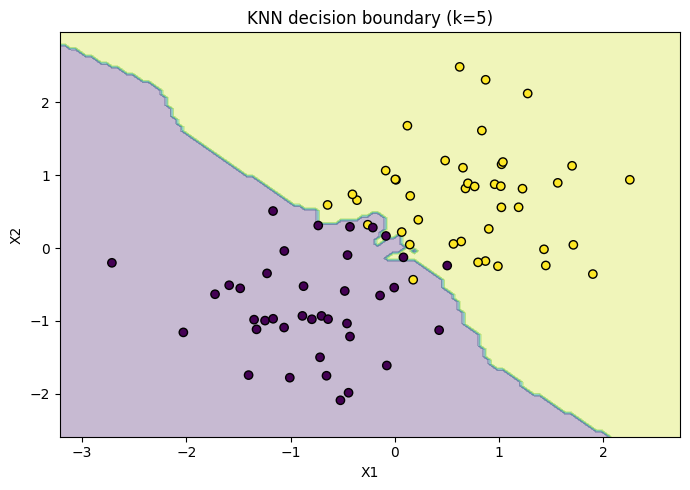

In [4]:
h = 0.05
x_min, x_max = X_train_s[:, 0].min() - 0.5, X_train_s[:, 0].max() + 0.5
y_min, y_max = X_train_s[:, 1].min() - 0.5, X_train_s[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train, edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"KNN decision boundary (k={k})")
plt.tight_layout()
plt.show()

## Key Takeaways

- **KNeighborsClassifier** / **KNeighborsRegressor**; **n_neighbors** (k) is the main hyperparameter.
- Always **scale features** so distance is not dominated by one variable.
- Use **weights='distance'** to weight by inverse distance; tune **k** with cross-validation.